# FINAL PROJECT - TRACK THE BICYCLE

The detection is out of the scope of the project, consider that for the following series of images, the bounding box are already calculated and returned in a file.

You will track the bicycle using the measurements of the center of the detected Bounding Box.

You will download a video from the VIRAT Video Dataset:
*   *VIRAT_S_010204_09_001285_001336.mp4* is the original image from the [VIRAT Video Dataset](https://viratdata.org)

![alt text](https://raw.githubusercontent.com/Jeremy26/kalman_filters_course/master/images/screen_scene.png)

**About the dataset**
A Large-scale Benchmark Dataset for Event Recognition in Surveillance Video" by Sangmin Oh, Anthony Hoogs, Amitha Perera, Naresh Cuntoor, Chia-Chih Chen, Jong Taek Lee, Saurajit Mukherjee, J.K. Aggarwal, Hyungtae Lee, Larry Davis, Eran Swears, Xiaoyang Wang, Qiang Ji, Kishore Reddy, Mubarak Shah, Carl Vondrick, Hamed Pirsiavash, Deva Ramanan, Jenny Yuen, Antonio Torralba, Bi Song, Anesco Fong, Amit Roy-Chowdhury, and Mita Desai, in Proceedings of IEEE Comptuer Vision and Pattern Recognition (CVPR), 2011.
[Access Link](https://viratdata.org).

**About the project** <p>
You are given an image detection algorithm that isn't ideal. Sometimes, the algorithm fails and misses the target. These happen during occlusion or failures from the algorithm for various reasons.
Using a Kalman Filter is an effective way to keep track of the data; and that's exactly what we'll do!

**The goal of the project will be to use a Kalman Filter to continue tracking the pedestrian even when the detector fails. You'll have to include the detector's measurements to improve the filter and help it converge.**


In [1]:
from ultralytics import YOLO
import cv2

In [42]:
video_path = r"C:\Users\kagad\Kalman_filter\VIRAT_S_010204_09_001285_001336.mp4"

In [43]:
model = YOLO("yolov8n.pt")  # Load a pretrained YOLOv8 model

In [79]:
import cv2
from ultralytics import YOLO
import time

# 1. Load your model (change to your weights file as needed)
model = YOLO('yolov8n.pt')

# 2. Open the video (video_path is defined in cell 3)
video = cv2.VideoCapture(video_path)
if not video.isOpened():
    raise IOError(f"Cannot open video: {video_path}")

frames = {}      # dict to store detection results per frame
frame_idx = 0
found = False    # frame counter

while True:
    ret, frame = video.read()
    if not ret:
        break  # end of video

    # 3. Run inference (filter to class 1, confidence ≥ 0.3)
    results = model(frame, classes=[1], conf=0.3)[0]

    # 4. Extract bounding boxes as a list of [x1, y1, x2, y2]
    boxes = results.boxes.xyxy.cpu().numpy().tolist()

    # 5. Store detections (or "Not detected")
    if boxes:
        count = 1
        if boxes:
            first_box = boxes[0]
            center_x = (first_box[0] + first_box[2]) / 2
            center_y = (first_box[1] + first_box[3]) / 2
            frames[frame_idx] = [[center_x, center_y],time.time()]
    elif count == 1:
        frames[frame_idx] = ["Not detected",time.time()]

    frame_idx += 1




0: 384x640 (no detections), 43.6ms
Speed: 2.7ms preprocess, 43.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.5ms
Speed: 4.0ms preprocess, 42.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.6ms
Speed: 3.5ms preprocess, 42.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 2.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.6ms
Speed: 1.0ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.5ms
Speed: 1.4ms preprocess, 14.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference

In [80]:
values = list(frames.values())  # Display the stored results
print("Stored results:",values)

Stored results: [[[314.63623046875, 314.125732421875], 1746134763.0337722], ['Not detected', 1746134763.0490756], ['Not detected', 1746134763.0674317], ['Not detected', 1746134763.0826435], ['Not detected', 1746134763.0986967], ['Not detected', 1746134763.1205683], ['Not detected', 1746134763.140516], [[339.6812744140625, 320.01934814453125], 1746134763.168981], ['Not detected', 1746134763.1930768], ['Not detected', 1746134763.2090726], ['Not detected', 1746134763.2322786], [[351.28546142578125, 322.64166259765625], 1746134763.2495463], ['Not detected', 1746134763.2684026], ['Not detected', 1746134763.284908], [[361.1112365722656, 319.0944519042969], 1746134763.3037415], [[361.4443359375, 322.3031005859375], 1746134763.3260143], [[365.45208740234375, 321.68603515625], 1746134763.345353], [[368.3341064453125, 322.37628173828125], 1746134763.363942], [[369.28948974609375, 322.2049255371094], 1746134763.3870203], [[373.6126708984375, 324.0076904296875], 1746134763.4045904], [[377.93255615

## Imports

In [53]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import copy
import pickle
import numpy as np
import time
import cv2

# Step 1 - The System
You are given a video that will be processed frame by frame. <p>

*   Sometimes, the algorithm processing the frame will return **an (X,Y) coordinate** indicating where the bicycle is supposed to be as well as a timestamp.
*   Sometimes, it won't and will return **"Not detected"**, which we know to be wrong.


In [5]:
%pwd

'c:\\Users\\kagad\\Kalman_filter'

In [ ]:
!wget https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/VIRAT_S_010204_09_001285_001336.mp4

In [ ]:
!wget https://thinkautonomous-tracking.s3.eu-west-3.amazonaws.com/detect.mp4

We have two videos at our disposal:
* **"detect.mp4"** showing you the detections on the surveillance camera
* **"VIRAT_S_010204_09_001285_001336"**, showing you the raw video.

We'll first visualize the detect video, and then work on improving the tracking.

In [82]:
BICYCLE_MEASUREMENTS = [[264.0, 320.5], 'Not detected', [276.5, 324.0], [278.0, 323.5], [281.0, 322.5], [284.5, 323.5], [285.0, 324.0], [287.5, 324.0], [299.5, 326.5], [303.0, 327.0], [305.0, 326.5], [307.0, 327.0], [310.5, 326.5], [313.5, 323.5], [325.0, 323.5], [324.0, 326.5], [327.0, 327.0], [332.5, 327.0], [337.5, 323.5], [341.0, 324.0], [349.5, 325.5], [351.5, 325.5], [353.5, 325.0], [356.0, 325.0], [359.0, 325.0], [363.0, 325.0], [365.0, 322.5], [366.0, 322.5], [365.5, 322.0], [373.0, 325.5], [374.0, 325.0], [378.0, 324.5], [380.5, 323.5], [382.0, 323.5], [383.0, 324.0], [384.0, 323.0], [387.0, 322.0], [389.5, 322.0], [390.0, 321.5], [395.0, 324.0], [396.0, 322.5], [397.5, 323.5], [398.5, 323.0], [402.0, 322.5], [407.0, 336.0], [407.5, 335.5], [412.0, 336.0], [413.0, 336.5], [412.0, 339.5], [420.5, 337.0], [421.5, 336.0], [422.0, 336.0], [424.0, 336.0], [428.5, 336.5], [430.0, 337.0], [434.0, 337.5], [434.5, 337.0], [437.5, 336.5], [438.5, 336.0], 'Not detected', 'Not detected', [451.5, 336.5], [454.0, 336.5], 'Not detected', 'Not detected', [460.0, 336.5], 'Not detected', [462.5, 336.0], 'Not detected', 'Not detected', [473.0, 336.0], 'Not detected', 'Not detected', 'Not detected', [483.0, 335.5], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [527.5, 351.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [596.0, 381.0], [597.0, 365.0], [600.0, 380.0], [605.0, 380.0], [607.0, 381.0], [608.0, 381.0], [612.0, 380.0], [612.0, 380.0], [619.0, 383.0], [620.0, 382.5], [624.0, 392.0], [625.5, 392.0], [628.0, 380.5], [630.0, 393.5], [633.0, 393.0], [635.0, 394.0], [637.0, 394.0], [637.0, 395.0], [644.0, 397.0], [644.0, 397.0], [646.0, 395.5], [647.5, 394.5], [651.5, 393.5], 'Not detected', [655.0, 407.0], [656.0, 391.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', [669.0, 410.0], [669.0, 410.0], [673.0, 419.5], [675.0, 422.5], [679.5, 422.5], [680.5, 424.5], [683.0, 424.5], [685.0, 426.0], [686.0, 432.0], [695.0, 433.5], [694.5, 434.5], [696.5, 437.0], [700.0, 421.5], [700.0, 421.5], [705.0, 421.5], [708.0, 423.0], [709.0, 424.5], [712.5, 427.0], [715.0, 426.5], [716.0, 429.5], [718.5, 431.5], [722.0, 434.0], [724.5, 433.5], [725.0, 434.5], 'Not detected', 'Not detected', 'Not detected', [744.0, 466.0], [745.5, 453.0], [747.5, 455.0], [749.5, 453.5], [752.0, 455.0], [750.5, 457.0], 'Not detected', 'Not detected', 'Not detected', [761.0, 475.5], [761.0, 475.5], [762.5, 475.5], [764.0, 478.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [805.5, 537.0], [809.5, 536.5], [811.0, 536.5], [815.0, 538.0], 'Not detected', 'Not detected', [825.5, 563.0], 'Not detected', [842.5, 567.0], [844.5, 571.0], [845.5, 588.5], [852.0, 589.5], [857.0, 591.5], [864.0, 621.0], [868.0, 622.0], [874.0, 624.0], [891.0, 620.5], [891.0, 620.5], [897.5, 622.5], [909.0, 651.0], [919.5, 651.0], [928.0, 626.5], 'Not detected', [948.0, 648.5], [955.5, 647.0], [971.5, 641.0], [976.5, 678.0], [993.0, 682.0], [1008.5, 685.0], [1008.5, 685.0], [1018.5, 688.0], [1048.5, 687.5], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected']
TIMESTAMPS = [1595343383.4528093, 1595343385.1370091, 1595343386.7868967, 1595343388.4632287, 1595343390.1011188, 1595343391.7460542, 1595343393.39343, 1595343395.028878, 1595343396.6552625, 1595343398.311383, 1595343399.9449534, 1595343401.5756452, 1595343403.253039, 1595343404.8913975, 1595343406.5174625, 1595343408.1842604, 1595343409.8111398, 1595343411.4432359, 1595343413.068713, 1595343414.6940196, 1595343416.3461204, 1595343417.9728732, 1595343419.6360095, 1595343421.2727242, 1595343422.934089, 1595343424.5932963, 1595343426.2158902, 1595343427.882905, 1595343429.5383394, 1595343431.1689167, 1595343432.7992053, 1595343434.4365535, 1595343436.093556, 1595343437.739813, 1595343439.3699863, 1595343441.026304, 1595343442.6605077, 1595343444.2896566, 1595343445.9262085, 1595343447.5629303, 1595343449.1896112, 1595343450.838177, 1595343452.4649684, 1595343454.2198577, 1595343455.8605254, 1595343457.4931364, 1595343459.137956, 1595343460.8218405, 1595343462.4845269, 1595343464.1445982, 1595343465.8397083, 1595343467.4892106, 1595343469.1747668, 1595343470.8333223, 1595343472.5270133, 1595343474.1908607, 1595343475.8525598, 1595343477.520469, 1595343479.1996396, 1595343480.9057856, 1595343482.604339, 1595343484.2830782, 1595343485.9620562, 1595343487.6216116, 1595343489.285687, 1595343490.9448197, 1595343492.599015, 1595343494.262499, 1595343495.9328613, 1595343497.604377, 1595343499.2598104, 1595343500.919045, 1595343502.5755124, 1595343504.2685933, 1595343505.9388247, 1595343507.6111808, 1595343509.727008, 1595343512.6301236, 1595343515.2081826, 1595343516.8960044, 1595343518.562933, 1595343520.223518, 1595343521.8825817, 1595343523.5388012, 1595343525.2359374, 1595343526.9006064, 1595343528.5632, 1595343530.250608, 1595343531.9128368, 1595343533.5599396, 1595343535.2325077, 1595343536.8938165, 1595343538.5590377, 1595343540.213533, 1595343541.8728576, 1595343543.534645, 1595343545.2209647, 1595343546.886572, 1595343548.5626056, 1595343550.2205744, 1595343551.8829527, 1595343553.5659046, 1595343555.2469, 1595343556.9008927, 1595343558.5652347, 1595343560.2281246, 1595343561.8948984, 1595343563.5591393, 1595343565.215573, 1595343566.8824282, 1595343568.5690107, 1595343570.2471654, 1595343571.9168723, 1595343573.5790687, 1595343575.2646444, 1595343576.9260058, 1595343578.6006463, 1595343580.262466, 1595343581.9326503, 1595343583.6091404, 1595343585.3043597, 1595343586.98645, 1595343588.677084, 1595343590.3740606, 1595343592.2494593, 1595343594.0968316, 1595343595.9687498, 1595343597.7663443, 1595343599.5230067, 1595343601.2006478, 1595343602.8708787, 1595343604.5619361, 1595343606.240997, 1595343607.9550593, 1595343609.640338, 1595343611.3281717, 1595343612.9923398, 1595343614.6791606, 1595343616.3586695, 1595343618.03751, 1595343619.7365143, 1595343621.4086063, 1595343623.0755863, 1595343624.7747118, 1595343626.4529173, 1595343628.1450953, 1595343629.8409429, 1595343631.5103605, 1595343633.2032287, 1595343634.8988585, 1595343636.5533113, 1595343638.2447634, 1595343639.9315574, 1595343641.6105409, 1595343643.3112786, 1595343644.9819617, 1595343646.6454144, 1595343648.3410013, 1595343650.0291924, 1595343651.7229924, 1595343653.4247396, 1595343655.0940385, 1595343656.766598, 1595343658.481635, 1595343660.1688697, 1595343661.851529, 1595343663.533179, 1595343665.2161155, 1595343666.9030716, 1595343668.6122663, 1595343670.3100102, 1595343671.9878461, 1595343673.6751158, 1595343675.361766, 1595343677.0522666, 1595343678.7405472, 1595343680.4148567, 1595343682.0903854, 1595343683.766348, 1595343685.4356513, 1595343687.1099372, 1595343688.82005, 1595343690.4986932, 1595343692.191855, 1595343693.8794398, 1595343695.5785794, 1595343697.2438045, 1595343698.998921, 1595343700.696096, 1595343702.375422, 1595343704.0798686, 1595343705.765661, 1595343707.4556317, 1595343709.2128184, 1595343710.8825693, 1595343712.5990374, 1595343714.2921202, 1595343715.9963896, 1595343717.6725974, 1595343719.3480031, 1595343721.0423503, 1595343722.7256033, 1595343724.4065895, 1595343726.0711443, 1595343727.7579536, 1595343729.4652514, 1595343731.1564894, 1595343732.8382416, 1595343734.516435, 1595343736.182922, 1595343737.882777, 1595343739.5695834, 1595343741.241596, 1595343742.9077015, 1595343744.5780733, 1595343746.2444737, 1595343747.9014044, 1595343749.56856, 1595343751.2365348, 1595343752.9167588, 1595343754.582135, 1595343756.2607112, 1595343757.9484925, 1595343759.6065814, 1595343761.2696397, 1595343762.9366505, 1595343764.5937672, 1595343766.266156, 1595343767.931009, 1595343769.606072, 1595343771.286105, 1595343772.9624963, 1595343774.622179, 1595343776.2862227, 1595343777.9396627, 1595343779.597795, 1595343781.266818, 1595343782.9147005, 1595343784.5958788, 1595343786.2695682, 1595343787.937123]
print(len(BICYCLE_MEASUREMENTS))

241


In [77]:
print(BICYCLE_MEASUREMENTS)
print(len(BICYCLE_MEASUREMENTS))
print(TIMESTAMPS)
print(len(TIMESTAMPS))

['Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not de

## Assigment - Design your Kalman Filter

How will you make it work? Take a piece of paper and design your Kalman Filter.<p>
**To do so, answer the following questions:**
*   How will the mean and covariance be initialize?
*   How will you initialize the other matrices?
*   What happens when nothing is detected?
*   What happens during a detection?
*   What Process Model (F) will you use?

# Step 2 - Implement the Filter

Now, let's code the filter, you have total freedom here. Just make it work!

In [ ]:
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise
import numpy as np
import matplotlib.pyplot as plt

def TwoDimensionsKF(R_std, Q_std, dt):
    """ Create first order Kalman filter. 
    Specify R and Q as floats."""
    kf = KalmanFilter(dim_x=4, dim_z=2)
    kf.P = np.eye(4)*500 # covariance   
    kf.R = np.eye(2) * R_std**2
    q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_std**2)
    kf.Q = block_diag(q, q)
    kf.F = np.array([[1, dt, 0,  0],
                    [0,  1, 0,  0],
                    [0,  0, 1, dt],
                    [0,  0, 0,  1]])

    kf.H = np.array([[1, 0, 0, 0],  # [X,X_dot,Y,Y_dot]
                    [0, 0, 1, 0]])
    return kf

In [12]:
kf = TwoDimensionsKF(R_std=5, Q_std=0.01, dt=sum(np.diff(TIMESTAMPS))/len(TIMESTAMPS))
kf.x = np.array([BICYCLE_MEASUREMENTS[0][0], 0, BICYCLE_MEASUREMENTS[0][1], 0])
print("first_position", kf.x)

first_position [264.    0.  320.5   0. ]


In [19]:
counter = 0

def main_pipeline(image):
    """
    Initialize a Kalman Filter, Run it, Make it converge!
    """

    global kf
    global counter

    measure = BICYCLE_MEASUREMENTS[counter]

    if measure == "Not detected":
        kf.predict()
        cv2.circle(image, (int(kf.x_prior[0]), int(kf.x_prior[2])), 5, (255,0,0), -1)

    else:
        z = np.array((measure[0], measure[1]))
        kf.update(z)
        cv2.circle(image, (int(kf.x[0]), int(kf.x[2])), 5, (78,200,120), -1)
        kf.predict()
        cv2.circle(image, (int(kf.x_prior[0]), int(kf.x_prior[2])), 5, (200,50,78), -1)
    counter+=1    
    return image

In [20]:
cam = cv2.VideoCapture("detect.mp4")

set_of_images = []
while(True):
    ret,frame = cam.read()
    if ret:
        set_of_images.append(frame)
    else:
        break

cam.release()

In [21]:
out_video = []

for img in set_of_images:
    out_video.append(main_pipeline(img))

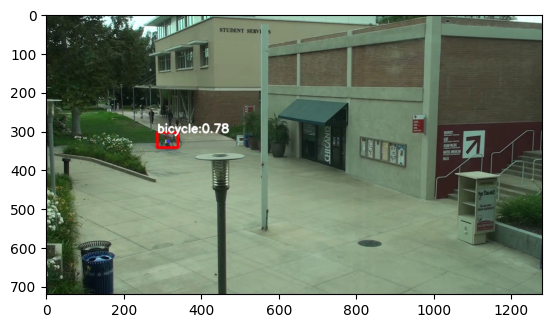

In [22]:
plt.imshow(cv2.cvtColor(out_video[12], cv2.COLOR_BGR2RGB))

In [23]:
out = cv2.VideoWriter("track.mp4",cv2.VideoWriter_fourcc(*'MP4V'), 20, (1280,720))

for i in range(len(out_video)):
    out.write(out_video[i])
out.release()